In [1]:
import pandas as pd
import numpy as np

In [3]:
# read in past data and future data and combine them
past_data = pd.read_csv("../data/scoring/past_data.csv")
future_data = pd.read_csv("../data/scoring/future_data.csv")
df = pd.concat([past_data, future_data]) 


import pandas as pd

# Engineer crime rate
df['crime_rate'] = df['offence_count'] / df['population']

# Normalize metrics
columns_to_normalize = ['nearest_park', 'nearest_school', 'nearest_hospital', 'nearest_supermarket', 'crime_rate', 'cost', 'population', 'weekly_income', 'distance_to_cbd']
for column in columns_to_normalize:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Define weights for liveability metrics
# Note: We're using negative weights for metrics where lower values are better.
weights = {
    'nearest_park': -0.15,
    'nearest_school': -0.15,
    'nearest_hospital': -0.15,
    'nearest_supermarket': -0.15,
    'distance_to_cbd': -0.15, 
    'crime_rate': -0.1,   
    'weekly_income': 0.1 
}

# Calculate liveability score
df['liveability_score'] = sum(df[col] * weight for col, weight in weights.items())

# Adjust the liveability score to be in the range [0, 1]
df['liveability_score'] = (df['liveability_score'] - df['liveability_score'].min()) / (df['liveability_score'].max() - df['liveability_score'].min())

# Calculate affordability score (inverse of cost)
df['affordability_score'] = 1 - df['cost']

# Combine liveability and affordability (assuming equal importance)
df['final_score'] = (df['liveability_score'] + df['affordability_score']) / 2

# Aggregate scores by LGA district
lga_scores = df.groupby('lga_name')['final_score'].mean()
liveable = df.groupby('lga_name')['liveability_score'].mean()
affordable = df.groupby('lga_name')['affordability_score'].mean()

# Rank LGA districts
lga_ranking = lga_scores.sort_values(ascending=False)
liveable_ranking = liveable.sort_values(ascending=False)
affordable_ranking = affordable.sort_values(ascending=False)

print(lga_ranking)
print(liveable_ranking)
print(affordable_ranking)


lga_name
wyndham          0.776067
moonee valley    0.769180
moreland         0.768884
buloke           0.764032
hepburn          0.759744
                   ...   
ararat           0.537297
swan hill        0.534029
wodonga          0.530047
loddon           0.518540
mildura          0.388813
Name: final_score, Length: 78, dtype: float64
lga_name
boroondara     0.969919
glen eira      0.948416
stonnington    0.934578
yarra          0.930905
moreland       0.927471
                 ...   
horsham        0.322554
ararat         0.297706
swan hill      0.268552
loddon         0.186209
mildura        0.023213
Name: liveability_score, Length: 78, dtype: float64
lga_name
buloke            0.901724
west wimmera      0.901538
hindmarsh         0.887367
yarriambiack      0.887103
gannawarra        0.875462
                    ...   
melbourne         0.533439
manningham        0.530392
surf coast        0.516853
yarra             0.492800
bayside (vic.)    0.346729
Name: affordability_score, L

In [8]:
past_data = pd.read_csv("../data/scoring/past_data.csv")
future_data = pd.read_csv("../data/scoring/future_data.csv")
new_df = pd.concat([past_data, future_data]) 



# Engineer crime rate
new_df['crime_rate'] = new_df['offence_count'] / new_df['population']

In [9]:
new_df

,Unnamed: 0,lga_name,cost,beds,baths,parkings,nearest_station,nearest_park,nearest_shop,nearest_hospital,nearest_school,nearest_supermarket,distance_to_cbd,year,offence_count,population,weekly_income,crime_rate
0,0,alpine,270.000000,2.0,1.0,2.0,46.428333,5.346667,38.880000,29.888333,2.526667,2.446667,999.000000,2017,396.00,13113.0,592.342001,0.030199
1,1,ararat,260.000000,3.0,1.0,1.0,2.428333,28.928333,2.536667,999.000000,1.433333,3.033333,999.000000,2017,1249.00,11613.0,579.692855,0.107552
2,2,ballarat,280.000000,3.0,2.0,2.0,7.341667,9.785000,6.483333,24.810000,2.235000,4.776667,999.000000,2017,11885.00,152520.0,617.844766,0.077924
3,3,banyule,395.000000,3.0,1.0,1.0,2.876667,11.215000,9.528333,5.353333,1.760000,2.630000,23.140000,2017,9703.00,129192.0,762.060273,0.075105
4,4,bass coast,285.000000,3.0,2.0,2.0,86.750000,32.095000,22.930000,39.630000,3.885000,7.376667,116.675000,2017,2613.00,34166.0,528.836271,0.076480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,232,wodonga,472.344172,3.0,2.0,2.0,10.213333,999.000000,5.975000,81.821667,2.803333,3.890000,999.000000,2026,3062.08,77804.0,961.461424,0.039356
230,233,wyndham,516.049445,4.0,2.0,2.0,6.440000,12.295000,7.668333,13.736667,2.543333,3.648333,34.695000,2026,16824.66,778022.0,1027.621898,0.021625
231,234,yarra,633.788319,2.0,1.0,1.0,3.283333,6.468333,4.310000,4.795000,1.603333,1.371667,9.305000,2026,12807.03,164835.0,1687.176131,0.077696
232,235,yarra ranges,532.294229,3.0,2.0,2.0,4.188333,15.453333,6.746667,9.856667,2.313333,3.796667,44.118333,2026,7455.14,171416.0,978.806597,0.043492


In [10]:
lga_ranking[0:20]

lga_name
wyndham              0.776067
moonee valley        0.769180
moreland             0.768884
buloke               0.764032
hepburn              0.759744
greater dandenong    0.757923
darebin              0.757816
boroondara           0.755825
glen eira            0.753016
nillumbik            0.752974
melton               0.751797
brimbank             0.751174
hobsons bay          0.748253
whittlesea           0.747429
banyule              0.747110
maribyrnong          0.746595
cardinia             0.746587
casey                0.742720
baw baw              0.742119
yarra ranges         0.739496
Name: final_score, dtype: float64

# find out the features for top three LGA areas

In [12]:
crime = new_df.groupby('lga_name')['crime_rate'].mean()
crime = crime.sort_values()

print(crime['wyndham'])
print(crime['moonee valley'])
print(crime['moreland'])


0.02597442735867294
0.04166720409608208
0.046147886364168604


In [13]:
school = new_df.groupby('lga_name')['nearest_school'].mean()
school = school.sort_values()

print(school['wyndham'])
print(school['moonee valley'])
print(school['moreland'])


2.543333333333333
1.8766666666666665
1.7633333333333332


In [14]:
hospital = new_df.groupby('lga_name')['nearest_hospital'].mean()
hospital = hospital.sort_values()


print(hospital['wyndham'])
print(hospital['moonee valley'])
print(hospital['moreland'])

13.736666666666668
10.991666666666667
4.366666666666666


In [15]:
supermarket = new_df.groupby('lga_name')['nearest_supermarket'].mean()
supermarket = supermarket.sort_values()


print(supermarket['wyndham'])
print(supermarket['moonee valley'])
print(supermarket['moreland'])

3.6483333333333325
2.845
1.6983333333333337


In [16]:
station = new_df.groupby('lga_name')['nearest_station'].mean()
station  = station .sort_values()


print(station['wyndham'])
print(station['moonee valley'])
print(station['moreland'])

6.44
3.6666666666666665
2.953333333333333


# plot the top 10 area

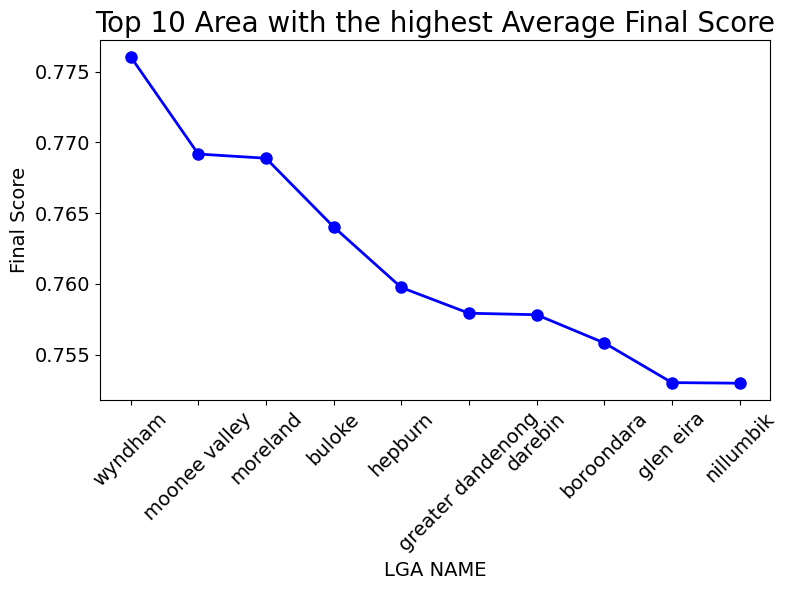

In [19]:
import matplotlib.pyplot as plt
first10_lga_ranking = lga_ranking[0:10]
plt.figure(figsize=(8, 6))
plt.plot(first10_lga_ranking.index, first10_lga_ranking.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('LGA NAME', fontsize = 14)
plt.ylabel('Final Score', fontsize=14)
plt.title('Top 10 Area with the highest Average Final Score', fontsize = 20)
plt.xticks(rotation=45, fontsize = 14) 
plt.yticks(fontsize = 14) 
plt.tight_layout()
plt.savefig("../plots/top 10 average score.png")

In [20]:
liveable_ranking[0:20]

lga_name
boroondara         0.969919
glen eira          0.948416
stonnington        0.934578
yarra              0.930905
moreland           0.927471
bayside (vic.)     0.925073
moonee valley      0.921945
port phillip       0.919085
nillumbik          0.911164
melbourne          0.901262
darebin            0.896414
wyndham            0.894382
manningham         0.893933
hobsons bay        0.892130
banyule            0.890188
whitehorse         0.880678
macedon ranges     0.877185
monash             0.872931
maribyrnong        0.870645
kingston (vic.)    0.863720
Name: liveability_score, dtype: float64

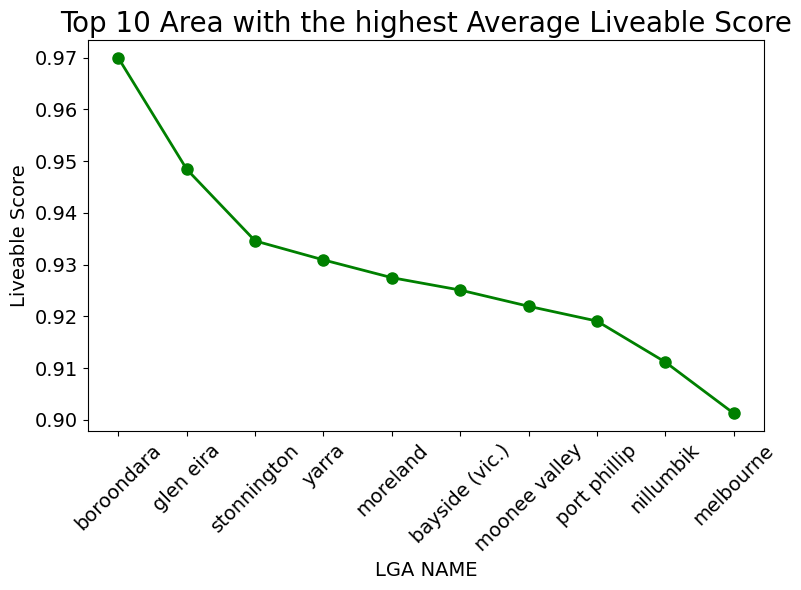

In [22]:
first10_liveable_ranking = liveable_ranking[0:10]
plt.figure(figsize=(8, 6))
plt.plot(first10_liveable_ranking.index, first10_liveable_ranking.values, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('LGA NAME', fontsize=14)
plt.ylabel('Liveable Score',fontsize=14)
plt.title('Top 10 Area with the highest Average Liveable Score',fontsize=20)
plt.xticks(rotation=45, fontsize = 14) 
plt.yticks(fontsize = 14) 
plt.tight_layout()
plt.savefig("../plots/top 10 livable score.png")

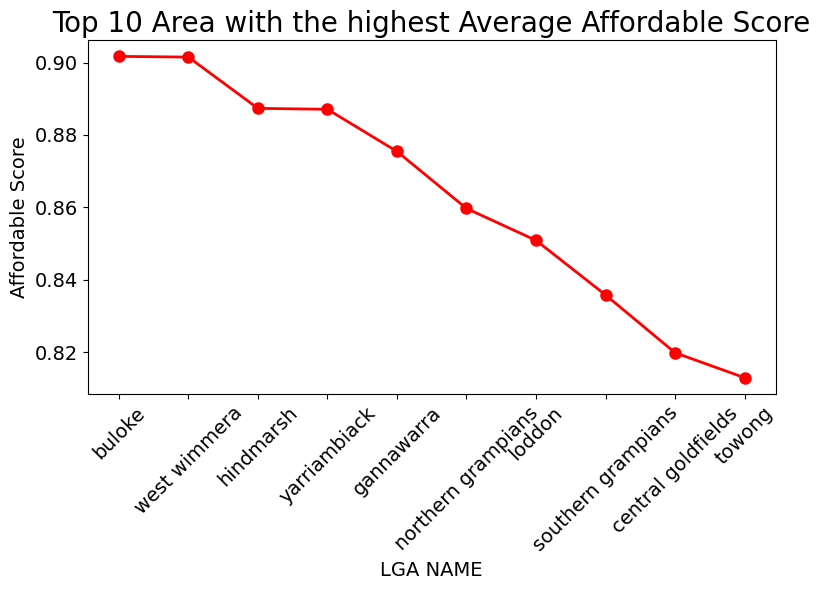

In [24]:
first10_affordable_ranking = affordable_ranking[0:10]
plt.figure(figsize=(8, 6))
plt.plot(first10_affordable_ranking.index, first10_affordable_ranking.values, marker='o', color='r', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('LGA NAME', fontsize=14)
plt.ylabel('Affordable Score',fontsize=14)
plt.title('Top 10 Area with the highest Average Affordable Score',fontsize=20)
plt.xticks(rotation=45, fontsize = 14) 
plt.yticks(fontsize = 14) 
plt.tight_layout()
plt.savefig("../plots/top 10 affordable score")
